# Computer Vision - P3_2


## Delivery

Up to **1 point out of 10** will be penalized if the following requirements are not fulfilled:

- Implemented code should be commented.

- The questions introduced in the exercises must be answered.

- Add title to the figures to explain what is displayed.

- Comments need to be in **English**.

- The deliverable must be a file named **P3_Student1_Student2.zip** that includes:
    - The notebook P3_Student1_Student2.ipynb completed with the solutions to the exercises and their corresponding comments.
    - All the images used in this notebook.

**Deadline (Campus Virtual): October 26th, 23:00 h** 

==============================================================================================
## Practicum 3: Image and Video Segmentation

==============================================================================================

The main topics are:

In Video Segmentation:

3.1. Segmentation of video shots with static scenes.

3.2. Background subtraction.

In Image Segmentation:

3.3. Segmentation of images.

To successfuly complete this practicum it is necessary to understand the following theory concepts: video segmentation, background subtraction, K-means clustering, different image segmentation approaches,...

The following chapters of the book “Computer Vision: Algorithms and Applicatons” from Richard Szeliski have further information about the topic:

* Chapter 4: Computer Vision: Algorithms and Applications.

* Chapter 5: Segmentation.



## 3.3 Segmentation of images

Apply the image segmentation methods (Felzenswhalbs, Slic and Quickshift) based on the clustering of points corresponding to the pixels but in the feature space RGB-XY space.

**Hint**: 
- Different image segmentation commands can be found in skimage.segmentation.
- Use the function segmentation.mark_boundaries for seeing the boundaries of the segments.
- Use the inline pluggin to visualize images (%matplotlib inline).

### Felzenszwalb's efficient graph based segmentation

a) Read 'rocki.jpeg' image from the folder 'images' and segment it using the Felzenszwalbs's method. Comment the result.


In [ ]:
%matplotlib inline

In [2]:
# imports we will need in the notebook:
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
from skimage.util import img_as_float
from skimage.color import rgb2gray
from skimage.filters import sobel
from skimage.segmentation import felzenszwalb, slic, quickshift
from skimage.segmentation import mark_boundaries
from skimage.transform import rescale, resize

(-0.5, 767.5, 1023.5, -0.5)

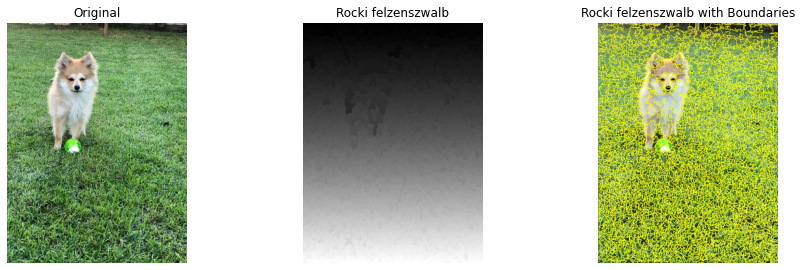

In [25]:
# Your soluction here
rocki = io.imread('images/rocki.jpeg')#read the image
"""
The scale parameter influences the segment size, it sets an observation level. Higher scale means less and larger segments. 
The number and size of the segments can also be influenced by the min_size parameter.

Sigma is the diameter of a Gaussian kernel, used for smoothing the image prior to segmentation. 
"""
rocki_Segmented = felzenszwalb(rocki, scale=100, sigma=0.5, min_size=50)
Segmented_wth_Boundaries = mark_boundaries(rocki, rocki_Segmented)

#visualize
fig = plt.figure(figsize=(15,15))

fig.add_subplot(3,3,1)
plt.title('Original')
plt.imshow(rocki, cmap='gray')
plt.axis('off')

fig.add_subplot(3,3,2)
plt.title('Rocki felzenszwalb')
plt.imshow(rocki_Segmented, cmap='gray')
plt.axis('off')

fig.add_subplot(3,3,3)
plt.title('Rocki felzenszwalb with Boundaries')
plt.imshow(Segmented_wth_Boundaries, cmap='gray')
plt.axis('off')

b) Test and explore different parameters in order to obtain a good image segmentation up to you. 
Answer the following qüestions:
- Is it critical to convert the image in grayscale in order to do the image segmentation?
- Is it critical to convert the image in float in order to do the image segmentation?
- Which are the optimal values according to your subjective perception?
- How does each parameter behave?

Note: You can reduce the size of the image in order to accelerate the running. Does the image reduction affect the optimal values? 



(-0.5, 75.5, 101.5, -0.5)

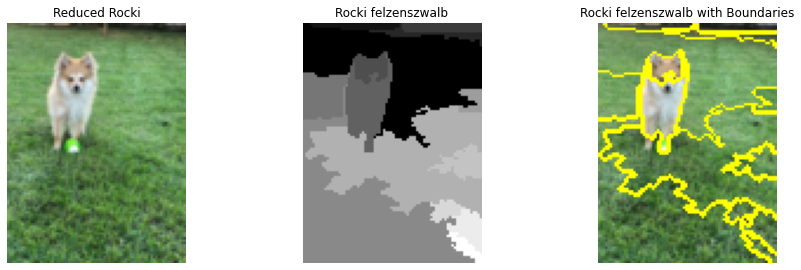

In [39]:
#your solution here
#reducing the size to see how it changes
rocki = io.imread('images/rocki.jpeg')#read the image

#using the resize command from skimage
reduced_rocki = resize(rocki, (rocki.shape[0] // 10, rocki.shape[1] // 10)) #Reduce it by 10

rocki_Segmented = felzenszwalb(reduced_rocki, scale=100, sigma=0.5, min_size=50)
Segmented_wth_Boundaries = mark_boundaries(reduced_rocki, rocki_Segmented)

#visualize
fig = plt.figure(figsize=(15,15))

fig.add_subplot(3,3,1)
plt.title('Reduced Rocki')
plt.imshow(reduced_rocki, cmap='gray')
plt.axis('off')

fig.add_subplot(3,3,2)
plt.title('Rocki felzenszwalb')
plt.imshow(rocki_Segmented, cmap='gray')
plt.axis('off')

fig.add_subplot(3,3,3)
plt.title('Rocki felzenszwalb with Boundaries')
plt.imshow(Segmented_wth_Boundaries, cmap='gray')
plt.axis('off')

In [ ]:
"""
You can reduce the size of the image in order to accelerate the running. Does the image reduction affect the optimal values?
Yes, while scale affects the size of each segment, reducing the size of the image also has an effect on the number of segments.
The bigger the scale parameter, the bigger the segments, hence less segments will appear, makes sense. But why does having a
smaller image means having less segments? Its the oposite effect of the scale parameter, but it makes sense. Think about it, 
if we reduce the size of an image, it has less pixels (it will look more pixelated), so there is less of chance for you to have
a segment, if an image its too pixelated you might not even be able to segment the image at all.
"""

int64


(-0.5, 767.5, 1023.5, -0.5)

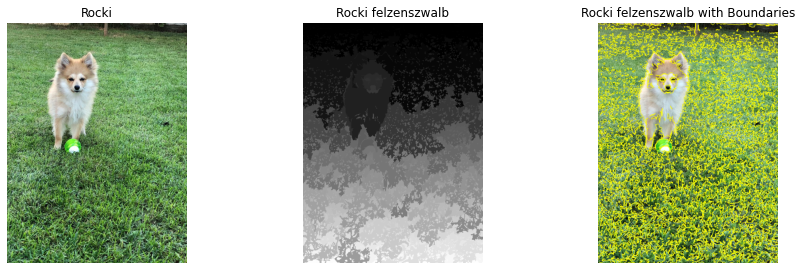

In [26]:
# Your soluction here
#changeing the values until we think it looks better
rocki = io.imread('images/rocki.jpeg')#read the image

rocki_Segmented = felzenszwalb(rocki, scale=300, sigma=1, min_size=10)
Segmented_wth_Boundaries = mark_boundaries(rocki, rocki_Segmented)
print(rocki_Segmented.dtype)
#visualize
fig = plt.figure(figsize=(15,15))

fig.add_subplot(3,3,1)
plt.title('Rocki')
plt.imshow(rocki, cmap='gray')
plt.axis('off')

fig.add_subplot(3,3,2)
plt.title('Rocki felzenszwalb')
plt.imshow(rocki_Segmented, cmap='gray')
plt.axis('off')

fig.add_subplot(3,3,3)
plt.title('Rocki felzenszwalb with Boundaries')
plt.imshow(Segmented_wth_Boundaries, cmap='gray')
plt.axis('off')

In [ ]:
"""
Is it critical to convert the image in grayscale in order to do the image segmentation?

Grayscale is good for extracting descriptors because it simplifies the algorithm and reduces computational requirements. 
Color may give unnecessary information, slowing performance. Aside from speed, it doesn't seem to be critical. For object 
detection for example, you might want to keep the color of the image since maybe you are tracking the color orange, or orange
objects, but for image segmentation you really don't need color, and using the grayscale version of an image makes things 
very easy to compute. Most algorithms use grayscale for a reason. Most methods for image segmentation allow grayscale and rbg 
images as input.

Is it critical to convert the image in float in order to do the image segmentation?
Some methods do require the data type to be float; however, as we can see, after applying the segmentation function, the 
data type of the image remains int. Felzenszwalb seems to be very flexible with its input

Which are the optimal values according to your subjective perception?
scale=300, sigma=1, min_size=10 seem to be the best parameters for a better result with this picture. In the boundaries image
it might not be as obvious, but with the segmented image (grayscale) you can actully see the silhouette of the dog, its eyes and
ears, even the nose and mouth, same thing applies with the gray and the depht of it.

How does each parameter behave?
The scale represents the size of the segments. Bigger scale = less segments.
Sigma is how much we smooth the image before segmentation. The higher the value the smoother.
Min_scale is the minimum value for the segment. Lower value means more details, as we can see with the grass.

Multichannel is optional (default: True)
Whether the last axis of the image is to be interpreted as multiple channels.
A value of False, for a 3D image, is not currently supported. This argument is deprecated: specify channel_axis instead.

Channel_axis is also optional. If None, the image is assumed to be a grayscale (single channel) 
Otherwise, this parameter indicates which axis of the array corresponds to channels.
"""

c) Comment the definition of the algorithm (use approximately 3 lines at most), its advantages and disadvantages.

In [ ]:
#your solution here
"""
According to scikit-image.org, Felzenszwalb Produces an oversegmentation of a multichannel (RGB) image using a fast, 
minimum spanning tree based clustering on the image grid. For RGB images, the algorithm uses the euclidean distance
between pixels in color space.
"""

### SLIC - K-Means based image segmentation
d) Segment the same image using the SLIC image segmentation algorithm using the parameters by default. 

uint8


<ipython-input-24-962b38f78214>:4: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  rocki_SLIC = slic(rocki) #without parameters because its default


(-0.5, 767.5, 1023.5, -0.5)

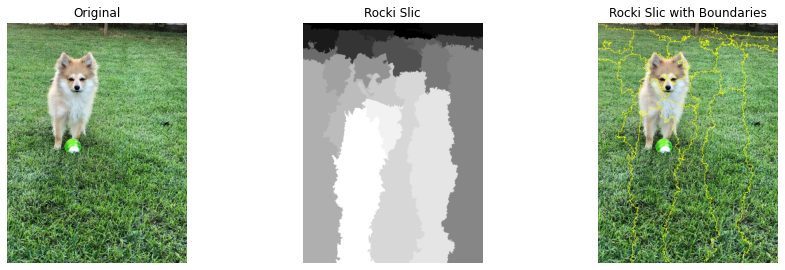

In [24]:
#your solution here
rocki = io.imread('images/rocki.jpeg')#read the image

rocki_SLIC = slic(rocki) #without parameters because its default
Segmented_wth_Boundaries = mark_boundaries(rocki, rocki_SLIC)

#visualize
fig = plt.figure(figsize=(15,15))

fig.add_subplot(3,3,1)
plt.title('Original')
plt.imshow(rocki, cmap='gray')
plt.axis('off')

fig.add_subplot(3,3,2)
plt.title('Rocki Slic')
plt.imshow(rocki_SLIC, cmap='gray')
plt.axis('off')

fig.add_subplot(3,3,3)
plt.title('Rocki Slic with Boundaries')
plt.imshow(Segmented_wth_Boundaries, cmap='gray')
plt.axis('off')

e) Explore what are the parameters of the slic function. Test different values for these parameters in order to obtain a good image segmentation with SLIC algorithm.
Answer the following qüestions:
- Is it critical to convert the image in grayscale in order to do the image segmentation?
- Is it critical to convert the image in float in order to do the image segmentation?
- Which are the optimal values of the optional valriables?
- How does each parameter behave?

<ipython-input-19-b75480fe110f>:1: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  rocki_SLIC_0 = slic(rocki, n_segments=100, compactness=10, sigma=1)
<ipython-input-19-b75480fe110f>:2: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  rocki_SLIC_1 = slic(rocki, n_segments=500, compactness=50, sigma=5)
<ipython-input-19-b75480fe110f>:3: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  rocki_SLIC_2 = slic(rocki, n_segments=100, compactness=10, sigma=1, min_size_factor = 0.15)


(-0.5, 767.5, 1023.5, -0.5)

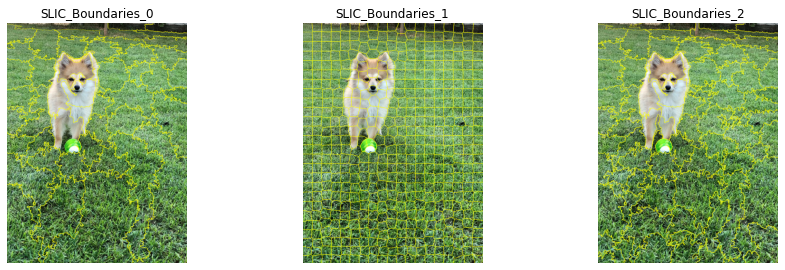

In [19]:
rocki_SLIC_0 = slic(rocki, n_segments=100, compactness=10, sigma=1)
rocki_SLIC_1 = slic(rocki, n_segments=500, compactness=50, sigma=5)
rocki_SLIC_2 = slic(rocki, n_segments=100, compactness=10, sigma=1, min_size_factor = 0.15)

SLIC_Boundaries_0 = mark_boundaries(rocki, rocki_SLIC_0)
SLIC_Boundaries_1 = mark_boundaries(rocki, rocki_SLIC_1)
SLIC_Boundaries_2 = mark_boundaries(rocki, rocki_SLIC_2)

#visualize
fig = plt.figure(figsize=(15,15))

fig.add_subplot(3,3,1)
plt.title('SLIC_Boundaries_0')
plt.imshow(SLIC_Boundaries_0, cmap='gray')
plt.axis('off')

fig.add_subplot(3,3,2)
plt.title('SLIC_Boundaries_1')
plt.imshow(SLIC_Boundaries_1, cmap='gray')
plt.axis('off')

fig.add_subplot(3,3,3)
plt.title('SLIC_Boundaries_2')
plt.imshow(SLIC_Boundaries_2, cmap='gray')
plt.axis('off')

In [ ]:
#your solution here
"""
Is it critical to convert the image in grayscale in order to do the image segmentation?
No, according to scikit-image.org the input image can be 2D or 3D, and grayscale or multichannel.

Is it critical to convert the image in float in order to do the image segmentation?
No, if we print the data type of the slic segmented result, we can see it doesnt have to be float.

Which are the optimal values of the optional valriables?
n_segments=100, compactness=10, sigma=1, min_size_factor = 0.15. Changing the sigma value to 2 or 3 didnt
seems to have much of an impact. With rocki_SLIC_0, I was mostly disappointed with the dog´s silhouette, so in an attempt to
distingish the dog's silhouette better, I added the optional parameters of min_size and max_size factor, which unlike 
rocki_SLIC_0, on rocki_SLIC_2 you can see the silhouette better, specially on the feet.

How does each parameter behave?
n_segmentsint is the approximate number of labels in the segmented output image

Compactness balances color proximity and space proximity. Higher values give more weight to space proximity, 
making the shapes more square/cubic. This parameter depends strongly on image contrast and shapes of the objects in the image.
As we can see on SLIC_Boundaries_1, the segments look more cubic and similar because of the bigger compactness parameter.

Sigma works the same as in felzenszwalb

min_size_factor is the proportion of the minimum segment size to be removed with respect to the supposed segment size 
`depth*width*height/n_segments` (without this parameter, we wouldn't be able to see the outline of the feet)

max_size_factor is the proportion of the maximum connected segment size. A value of 3 works in most of the cases.
Initially we used this parameter (max_size_factor=3) along side with min_size_factor becuase it made sense to have both, 
but after changing its value to see different outcomes it didn't really made any significant changes.

"""

f) Comment what the algorithm is (in up to 3 lines).

In [ ]:
#your solution here
"""
This algorithm generates superpixels by clustering pixels based on their color similarity and proximity in the image plane. 
Segments image using k-means clustering in Color-(x,y,z) space.
"""


### Quickshift image segmentation

g) Segment the same image using the Quickshift algorithm. 

(-0.5, 767.5, 1023.5, -0.5)

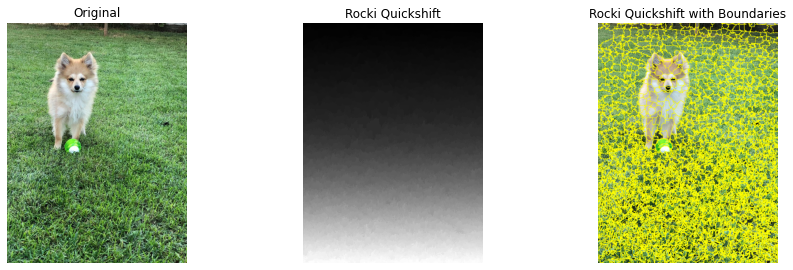

In [7]:
#your solution here
rocki = io.imread('images/rocki.jpeg')#read the image

rocki_Quick = quickshift(rocki) #without parameters because its default
Segmented_wth_Boundaries = mark_boundaries(rocki, rocki_Quick)

#visualize
fig = plt.figure(figsize=(15,15))

fig.add_subplot(3,3,1)
plt.title('Original')
plt.imshow(rocki, cmap='gray')
plt.axis('off')

fig.add_subplot(3,3,2)
plt.title('Rocki Quickshift')
plt.imshow(rocki_Quick, cmap='gray')
plt.axis('off')

fig.add_subplot(3,3,3)
plt.title('Rocki Quickshift with Boundaries')
plt.imshow(Segmented_wth_Boundaries, cmap='gray')
plt.axis('off')

h) Test different parameters in order to obtain a good image segmentation with Quickshift algorithm.
Answer the following qüestions:
- Which are the optimal values?
- How does each parameter behave?

(-0.5, 767.5, 1023.5, -0.5)

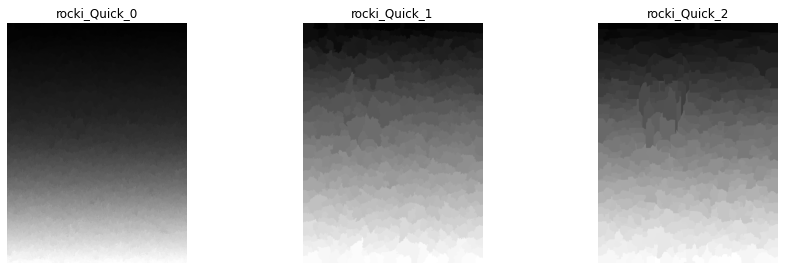

In [17]:
#your solution here
#this cell takes a lot of time to compile
rocki_Quick_0 = quickshift(rocki, ratio=1, max_dist=10)
rocki_Quick_1 = quickshift(rocki, ratio=0.01, max_dist=50)
rocki_Quick_2 = quickshift(rocki, ratio=0.15, max_dist=20, sigma=5)

Quick_Boundaries_0 = mark_boundaries(rocki, rocki_Quick_0)
Quick_Boundaries_1 = mark_boundaries(rocki, rocki_Quick_1)
Quick_Boundaries_2 = mark_boundaries(rocki, rocki_Quick_2)

#visualize
fig = plt.figure(figsize=(15,15))

fig.add_subplot(3,3,1)
plt.title('rocki_Quick_0')
plt.imshow(rocki_Quick_0, cmap='gray')
plt.axis('off')

fig.add_subplot(3,3,2)
plt.title('rocki_Quick_1')
plt.imshow(rocki_Quick_1, cmap='gray')
plt.axis('off')

fig.add_subplot(3,3,3)
plt.title('rocki_Quick_2')
plt.imshow(rocki_Quick_2, cmap='gray')
plt.axis('off')

(-0.5, 767.5, 1023.5, -0.5)

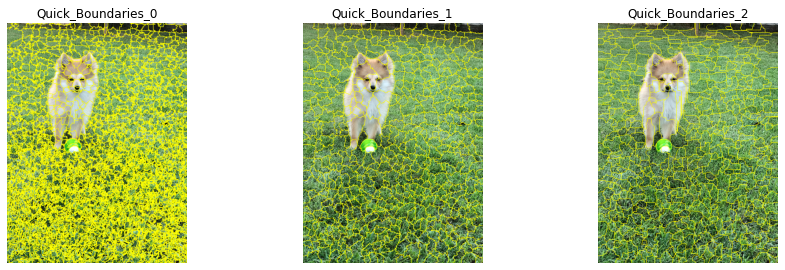

In [16]:
#visualize
fig = plt.figure(figsize=(15,15))

fig.add_subplot(3,3,1)
plt.title('Quick_Boundaries_0')
plt.imshow(Quick_Boundaries_0, cmap='gray')
plt.axis('off')

fig.add_subplot(3,3,2)
plt.title('Quick_Boundaries_1')
plt.imshow(Quick_Boundaries_1, cmap='gray')
plt.axis('off')

fig.add_subplot(3,3,3)
plt.title('Quick_Boundaries_2')
plt.imshow(Quick_Boundaries_2, cmap='gray')
plt.axis('off')

In [ ]:
"""
Which are the optimal values?
rocki_Quick_2 = quickshift(rocki, ratio=0.15, max_dist=20, sigma=5).
When comparing rocki_Quick_2 and rocki_Quick_1, without the sigma parameter, they looked fairly similiar, there was really 
no way to see a difference; however, after using the sigma parameter for rocki_Quick_2, we can now see a better and more
accurate silhouette of the dog, specially it doesn't mix with the grass, which happened with Quick_Boundaries_1. You can 
also notice the ball better in the rocki_Quick_2 print.

How does each parameter behave?

Ratio balances the color-space proximity. Higher value means we give more weight to color-space.
Kernel_size is the width for the gaussian function to smooth the sample density. A higher value gives us fewer clusters.
Max_dist is the cut-off point for data distances. A higher value gives fewer clusters.
Sigma works the same as in felzenszwalb.

There are more parameters, like random_seed and return_tree, but we didn't use them.
"""

i) Comment what the algorithm is (in up to 3 lines).

In [ ]:
#your solution here
"""
Produces an oversegmentation of the image using the quickshift mode-seeking algorithm.
It Segments an RGB image by identifying clusters of pixels in the joint spatial and color dimensions
"""

### Comparison of segmentation algorithms
j) Plot the original image and the results of both algorithms in a 1x3 subplot using the optimal values.

(-0.5, 767.5, 1023.5, -0.5)

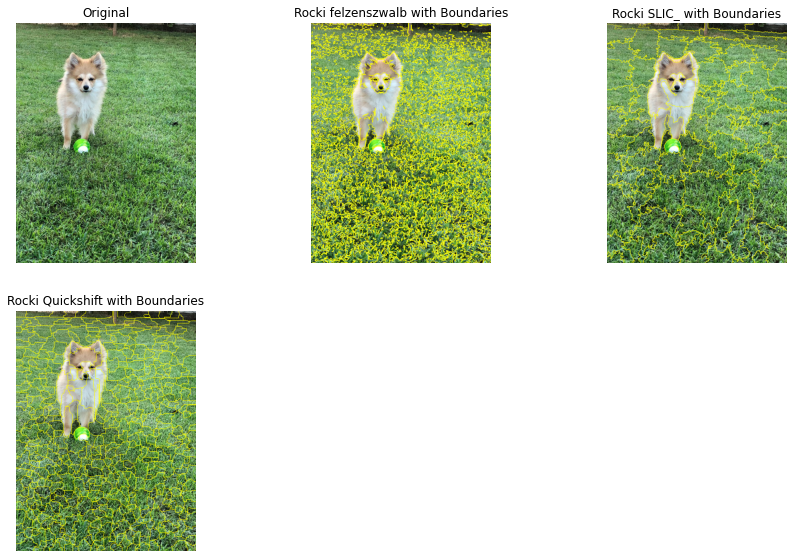

In [28]:
#your solution here
#visualize
fig = plt.figure(figsize=(15,15))

fig.add_subplot(3,3,1)
plt.title('Original')
plt.imshow(rocki, cmap='gray')
plt.axis('off')

fig.add_subplot(3,3,2)
plt.title('Rocki felzenszwalb with Boundaries')
plt.imshow(Segmented_wth_Boundaries, cmap='gray')
plt.axis('off')

fig.add_subplot(3,3,3)
plt.title('Rocki SLIC_ with Boundaries')
plt.imshow(SLIC_Boundaries_2, cmap='gray')
plt.axis('off')

fig.add_subplot(3,3,4)
plt.title('Rocki Quickshift with Boundaries')
plt.imshow(Quick_Boundaries_2, cmap='gray')
plt.axis('off')

k) Calculate also the number of segments obtained on the image by each of the algorithms. Can the number of segments can be used as a criterion for the performance of the algorithms?

In [30]:
#your solution here
print(f"Felsenszwalb number of segments: {len(np.unique(rocki_Segmented))}")
print(f"SLIC number of segments: {len(np.unique(rocki_SLIC_2))}")
print(f"Quickshift number of segments: {len(np.unique(rocki_Quick_2))}")
"""
Can the number of segments be used as a criterion for the performance of the algorithms?
No, ass we can see, Quickshift takes longer than Felsenszwalb despite giving a way bigger number of segments. The number of 
segments may depend drasticly on the paramaters. It is more important that the segments make sense, rather than the number.
"""

Felsenszwalb number of segments: 3535
SLIC number of segments: 81
Quickshift number of segments: 462


l) Comment the differences between each method as well as their advantages and disadvantages.

In [ ]:
#your solution here
"""
Felsenszwalb is definitely the easiest one to understand, and implement since it has less parameters. With both sigma and scale
you can manipulate the result as you wish since thats pretty much all you need to see different results. I believe the 
silhouette of the dog looks better on Felsenszwalb implementation, but the grass segments the worst, probably because 
the contrast of the image has a big influence on the size and number of segments. Overall, its an efficient algorithm. 

SLIC clusters pixels based on their color similarity, which is also not too hard to comprehend. It also provides a lot more 
parameters to use. I think the grass problem we had with Felsenszwalb is solved in SLIC thanks to the compactness parameter
which solves the problem of contrast we previusly had. The only disadvantage I see with SLIC is that having so many 
parameters can be confusing, and sometimes you can't even notice the difference in results.

Quickshift is definitely a middle ground between SLIC and Felsenszwalb, having a decent result for both the grass and the dog,
It also has a wide range of parameters to use, which can cause some confusion in noticing the different results, just like SLIC,
but still helpfull in order to get better results. Unfortunately this is the slowest by far.
"""


m) Choose another couple of color and grayscale images from the folder 'images' as well as from internet and apply the three segmentation methods. Comment the results.

<ipython-input-10-ab20147a6600>:8: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  dog_SLIC = slic(dog, n_segments=125, compactness=8, sigma=2, min_size_factor = 0.15)


(-0.5, 425.5, 319.5, -0.5)

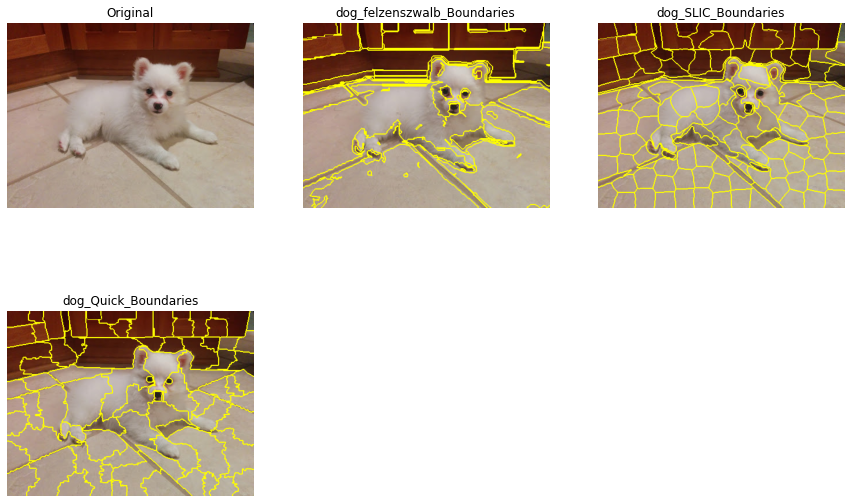

In [10]:
#your solution here

dog = io.imread('images/dog.jpg')#read the image

dog_felzenszwalb = felzenszwalb(dog, scale=150, sigma=1.5, min_size=10)
dog_felzenszwalb_Boundaries = mark_boundaries(dog, dog_felzenszwalb)

dog_SLIC = slic(dog, n_segments=125, compactness=8, sigma=2, min_size_factor = 0.15)
dog_SLIC_Boundaries = mark_boundaries(dog, dog_SLIC)

dog_Quick = quickshift(dog, ratio=1, max_dist=20, sigma=1)
dog_Quick_Boundaries = mark_boundaries(dog, dog_Quick)

#visualize
fig = plt.figure(figsize=(15,15))

fig.add_subplot(3,3,1)
plt.title('Original')
plt.imshow(dog, cmap='gray')
plt.axis('off')

fig.add_subplot(3,3,2)
plt.title('dog_felzenszwalb_Boundaries')
plt.imshow(dog_felzenszwalb_Boundaries, cmap='gray')
plt.axis('off')

fig.add_subplot(3,3,3)
plt.title('dog_SLIC_Boundaries')
plt.imshow(dog_SLIC_Boundaries, cmap='gray')
plt.axis('off')

fig.add_subplot(3,3,4)
plt.title('dog_Quick_Boundaries')
plt.imshow(dog_Quick_Boundaries, cmap='gray')
plt.axis('off')

<ipython-input-25-060506cd90ac>:6: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  sphinx_SLIC = slic(sphinx, n_segments=100, compactness=8, sigma=2, min_size_factor = 0.15)


(-0.5, 235.5, 294.5, -0.5)

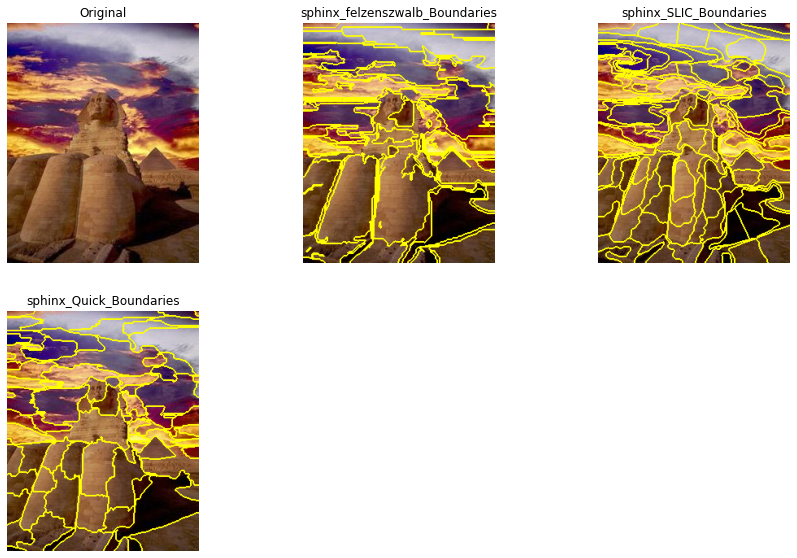

In [25]:
sphinx = io.imread('images/sphinx.jpg')#read the image

sphinx_felzenszwalb = felzenszwalb(sphinx, scale=150, sigma=1.5, min_size=10)
sphinx_felzenszwalb_Boundaries = mark_boundaries(sphinx, sphinx_felzenszwalb)

sphinx_SLIC = slic(sphinx, n_segments=100, compactness=8, sigma=2, min_size_factor = 0.15)
sphinx_SLIC_Boundaries = mark_boundaries(sphinx, sphinx_SLIC)

sphinx_Quick = quickshift(sphinx, ratio=1, max_dist=20, sigma=1)
sphinx_Quick_Boundaries = mark_boundaries(sphinx, sphinx_Quick)

#visualize
fig = plt.figure(figsize=(15,15))

fig.add_subplot(3,3,1)
plt.title('Original')
plt.imshow(sphinx, cmap='gray')
plt.axis('off')

fig.add_subplot(3,3,2)
plt.title('sphinx_felzenszwalb_Boundaries')
plt.imshow(sphinx_felzenszwalb_Boundaries, cmap='gray')
plt.axis('off')

fig.add_subplot(3,3,3)
plt.title('sphinx_SLIC_Boundaries')
plt.imshow(sphinx_SLIC_Boundaries, cmap='gray')
plt.axis('off')

fig.add_subplot(3,3,4)
plt.title('sphinx_Quick_Boundaries')
plt.imshow(sphinx_Quick_Boundaries, cmap='gray')
plt.axis('off')

<ipython-input-26-7041b07c9b8a>:6: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  tower_SLIC = slic(tower, n_segments=100, compactness=8, sigma=2, min_size_factor = 0.15)


(-0.5, 1179.5, 629.5, -0.5)

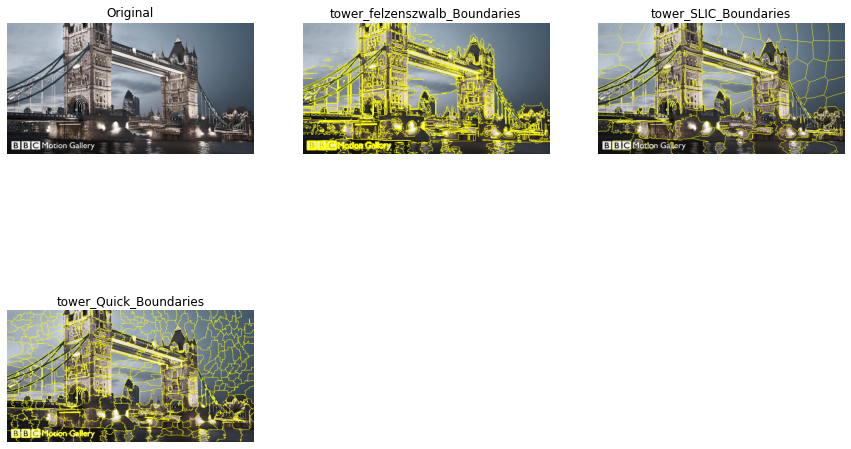

In [26]:
tower = io.imread('images/torre_londres.jpg')#read the image

tower_felzenszwalb = felzenszwalb(tower, scale=150, sigma=1.5, min_size=10)
tower_felzenszwalb_Boundaries = mark_boundaries(tower, tower_felzenszwalb)

tower_SLIC = slic(tower, n_segments=100, compactness=8, sigma=2, min_size_factor = 0.15)
tower_SLIC_Boundaries = mark_boundaries(tower, tower_SLIC)

tower_Quick = quickshift(tower, ratio=1, max_dist=20, sigma=1)
tower_Quick_Boundaries = mark_boundaries(tower, tower_Quick)

#visualize
fig = plt.figure(figsize=(15,15))

fig.add_subplot(3,3,1)
plt.title('Original')
plt.imshow(tower, cmap='gray')
plt.axis('off')

fig.add_subplot(3,3,2)
plt.title('tower_felzenszwalb_Boundaries')
plt.imshow(tower_felzenszwalb_Boundaries, cmap='gray')
plt.axis('off')

fig.add_subplot(3,3,3)
plt.title('tower_SLIC_Boundaries')
plt.imshow(tower_SLIC_Boundaries, cmap='gray')
plt.axis('off')

fig.add_subplot(3,3,4)
plt.title('tower_Quick_Boundaries')
plt.imshow(tower_Quick_Boundaries, cmap='gray')
plt.axis('off')

<ipython-input-27-61a5df1ea199>:6: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  gray_SLIC = slic(gray, n_segments=50, compactness=8, sigma=2, min_size_factor = 0.15)


(-0.5, 149.5, 199.5, -0.5)

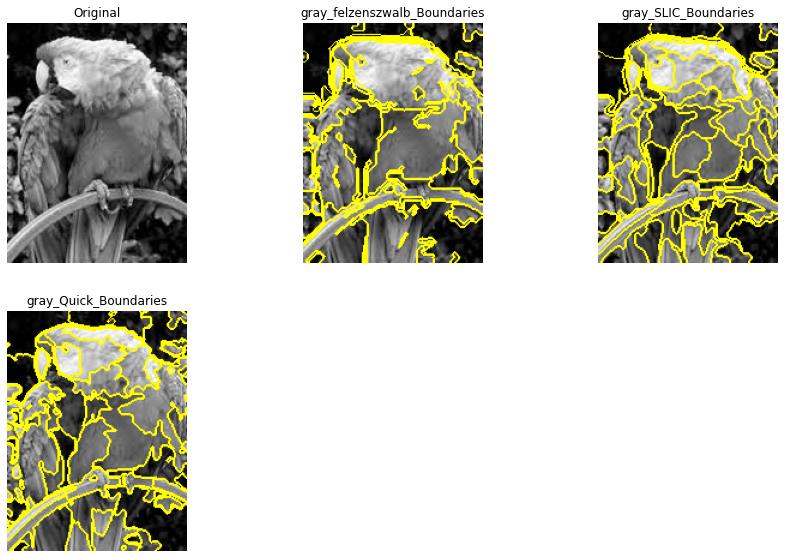

In [27]:
gray = io.imread('images/descarga.jpg')#read the image

gray_felzenszwalb = felzenszwalb(gray, scale=200, sigma=1.5, min_size=10)
gray_felzenszwalb_Boundaries = mark_boundaries(gray, gray_felzenszwalb)

gray_SLIC = slic(gray, n_segments=50, compactness=8, sigma=2, min_size_factor = 0.15)
gray_SLIC_Boundaries = mark_boundaries(gray, gray_SLIC)

gray_Quick = quickshift(gray, ratio=2, max_dist=20, sigma=1)
gray_Quick_Boundaries = mark_boundaries(gray, gray_Quick)

#visualize
fig = plt.figure(figsize=(15,15))

fig.add_subplot(3,3,1)
plt.title('Original')
plt.imshow(gray, cmap='gray')
plt.axis('off')

fig.add_subplot(3,3,2)
plt.title('gray_felzenszwalb_Boundaries')
plt.imshow(gray_felzenszwalb_Boundaries, cmap='gray')
plt.axis('off')

fig.add_subplot(3,3,3)
plt.title('gray_SLIC_Boundaries')
plt.imshow(gray_SLIC_Boundaries, cmap='gray')
plt.axis('off')

fig.add_subplot(3,3,4)
plt.title('gray_Quick_Boundaries')
plt.imshow(gray_Quick_Boundaries, cmap='gray')
plt.axis('off')

In [ ]:
"""
As we can see, the results are pretty good. Sometimes we don't even need to change the values of the parameters, but in 
most cases we have to make slight changes to the parameters in order to get good results.
"""